In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Observing the df

In [5]:
df = pd.read_csv('Groceries_dataset.csv')
df.sort_values(by='Member_number',ascending=True)

,Member_number,Date,itemDescription
1629,1000,27-05-2015,soda
13331,1000,24-06-2014,whole milk
8395,1000,15-03-2015,whole milk
4843,1000,15-03-2015,sausage
17778,1000,27-05-2015,pickled vegetables
...,...,...,...
34885,5000,10-02-2015,semi-finished bread
25489,5000,16-11-2014,other vegetables
9340,5000,16-11-2014,bottled beer
27877,5000,09-03-2014,onions


In [6]:
print('Total number of unique customers:',len(df['Member_number'].unique()))

Total number of unique customers: 3898


### Creating Dummy Variables

In [7]:
df_encoded = pd.get_dummies(df, columns=['itemDescription'])
df_encoded
df_encoded.columns = [col.replace('itemDescription_', '') for col in df_encoded.columns]
df_encoded.sort_values(by=['Member_number', 'Date'])

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
4843,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8395,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20992,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24544,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13331,1000,24-06-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,5000,10-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19727,5000,10-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34885,5000,10-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9340,5000,16-11-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Consolidating a member's daily purchases into a single row

In [11]:
df_grouped = df_encoded.groupby(['Member_number', 'Date']).agg(lambda x: 1 if x.any() else 0).reset_index()

# Sort the resulting DataFrame by 'Member_number' and 'Date'
df_grouped = df_grouped.sort_values(by=['Member_number', 'Date'])

In [12]:
#checking to see if it worked
df_grouped.iloc[0][df_grouped.iloc[0]==1]

sausage                1
semi-finished bread    1
whole milk             1
yogurt                 1
Name: 0, dtype: object

In [13]:
df_grouped

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1000,24-06-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000,24-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,25-11-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,27-05-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,4999,24-01-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14959,4999,26-12-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,5000,09-03-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,5000,10-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df_grouped.sum()

Member_number                                                     44991359
Date                     15-03-201524-06-201424-07-201525-11-201527-05-...
Instant food products                                                   60
UHT-milk                                                               320
abrasive cleaner                                                        22
                                               ...                        
white bread                                                            359
white wine                                                             175
whole milk                                                            2363
yogurt                                                                1285
zwieback                                                                60
Length: 169, dtype: object

### Support

In [62]:
# Slice the DataFrame to start from the 3rd column (index 2)
#df_grouped_sliced = df_grouped.iloc[:, 2:]

# Apply the Apriori algorithm with the sliced DataFrame
#frequent_itemsets = apriori(df_grouped_sliced, min_support=0.0001, use_colnames=True)
#frequent_itemsets

In [14]:
support=(df_grouped.iloc[:, 2:].sum()*100)/len(df_grouped)
sorted_support = support.sort_values(ascending=False)

<Axes: >

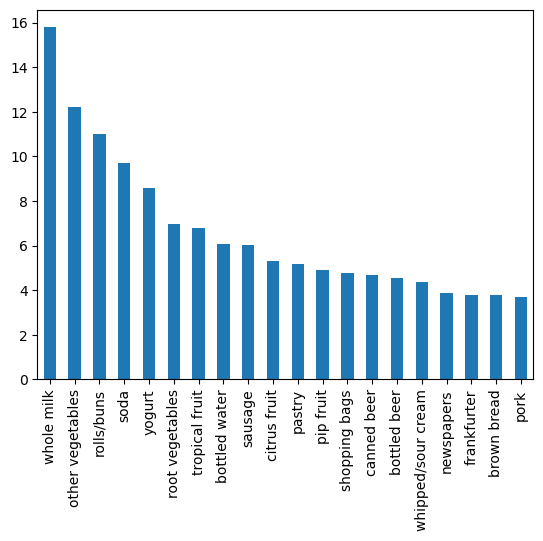

In [15]:
sorted_support[:20].plot(kind='bar')

#### Converting Purchase Items to list

In [16]:
# Create a new column 'Purchased_Items' that contains a list of item names
df_grouped['Purchased_Items'] = df_grouped[df_grouped.columns[2:]].apply(
    lambda row: df_grouped.columns[2:][row == 1].tolist(),
    axis=1
)
df_grouped['Purchased_Items']

0        [sausage, semi-finished bread, whole milk, yog...
1                        [pastry, salty snack, whole milk]
2                           [canned beer, misc. beverages]
3                              [hygiene articles, sausage]
4                               [pickled vegetables, soda]
                               ...                        
14958    [berries, kitchen towels, napkins, other veget...
14959                               [bottled water, herbs]
14960                      [fruit/vegetable juice, onions]
14961         [root vegetables, semi-finished bread, soda]
14962                     [bottled beer, other vegetables]
Name: Purchased_Items, Length: 14963, dtype: object

In [26]:
df_grouped.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Purchased_Items
0,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"[sausage, semi-finished bread, whole milk, yog..."
1,1000,24-06-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[pastry, salty snack, whole milk]"
2,1000,24-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[canned beer, misc. beverages]"
3,1000,25-11-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[hygiene articles, sausage]"
4,1000,27-05-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[pickled vegetables, soda]"


In [17]:
# 'Purchased_Items' column to list
transactions = df_grouped['Purchased_Items'].values.tolist()
transactions

[['sausage', 'semi-finished bread', 'whole milk', 'yogurt'],
 ['pastry', 'salty snack', 'whole milk'],
 ['canned beer', 'misc. beverages'],
 ['hygiene articles', 'sausage'],
 ['pickled vegetables', 'soda'],
 ['curd', 'frankfurter'],
 ['rolls/buns', 'sausage', 'whole milk'],
 ['soda', 'whole milk'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['sugar', 'tropical fruit'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['detergent', 'root vegetables'],
 ['dental care', 'frozen meals'],
 ['rolls/buns'],
 ['cling film/bags', 'dish cleaner'],
 ['canned beer', 'frozen fish'],
 ['hygiene articles', 'other vegetables'],
 ['pip fruit', 'tropical fruit', 'whole milk'],
 ['chocolate', 'red/blush wine', 'rolls/buns'],
 ['other vegetables', 'shopping bags'],
 ['chocolate', 'packaged fruit/vegetables', 'rolls/buns', 'whole milk'],
 ['pastry', 'root vegetables', 'whole milk'],
 

#### FInding support, confidence and lift

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert data to a one-hot encoded DataFrame
oht = pd.get_dummies(pd.Series(transactions).apply(lambda x: '|'.join(x)).str.get_dummies('|'))

# Generate frequent item sets
frequent_item_sets = apriori(oht, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_item_sets, metric="lift", min_threshold=1.0)

# Creating new DataFrame for rules
final_df = pd.DataFrame(columns=['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])

# Populate the final_df with rules data
for i in rules.iterrows():
    LHS = i[1]['antecedents']
    RHS = i[1]['consequents']
    SUPPORT = i[1]['support'] * 100
    CONFIDENCE = i[1]['confidence'] * 100
    LIFT = i[1]['lift']
    new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
    final_df = final_df.append(new_row, ignore_index=True)

# Create 'Rules' column
final_df['Rules'] = final_df['Left Hand Side'].apply(lambda x: ', '.join(x)) + ' -> ' + final_df['Right Hand Side'].apply(lambda x: ', '.join(x))

# Print number of rules
print('Number of Rules:', len(final_df), 'Rules')

# Display the first few rows of the final_df
final_df.head()


/Users/morgantucker/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Number of Rules: 240 Rules


/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/1897065937.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/1897065937.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/1897065937.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/1897065937.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,(tropical fruit),(UHT-milk),0.153712,2.268245,1.060617,tropical fruit -> UHT-milk
1,(UHT-milk),(tropical fruit),0.153712,7.187500,1.060617,UHT-milk -> tropical fruit
2,(brown bread),(beef),0.153712,4.085258,1.203301,brown bread -> beef
3,(beef),(brown bread),0.153712,4.527559,1.203301,beef -> brown bread
4,(citrus fruit),(beef),0.180445,3.396226,1.000349,citrus fruit -> beef


In [19]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming you've already prepared the 'df_grouped' DataFrame with one-hot encoding
# If not, include your code here to create 'df_grouped' as you mentioned.

# Generate frequent item sets
frequent_item_sets = apriori(df_grouped.iloc[:,2:169], min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_item_sets, metric="lift", min_threshold=1.0)

# Create a DataFrame for the rules
pd.options.display.float_format = '{:,.6f}'.format
final_df = pd.DataFrame(columns=['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])

# Process the rules
for _, row in rules.iterrows():
    LHS = list(row['antecedents'])
    RHS = list(row['consequents'])
    SUPPORT = row['support'] * 100
    CONFIDENCE = row['confidence'] * 100
    LIFT = row['lift']
    
    # Convert lists to strings and concatenate them
    LHS_str = ', '.join(LHS)
    RHS_str = ', '.join(RHS)
    
    new_row = {'Left Hand Side': LHS_str, 'Right Hand Side': RHS_str, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
    final_df = final_df.append(new_row, ignore_index=True)

final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']
print('Number of Rules:', final_df['Rules'].count(), 'Rules')
final_df.head()

/Users/morgantucker/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Number of Rules: 240 Rules


/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/3984254491.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/3984254491.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/3984254491.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_7883/3984254491.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,tropical fruit,UHT-milk,0.153712,2.268245,1.060617,tropical fruit -> UHT-milk
1,UHT-milk,tropical fruit,0.153712,7.187500,1.060617,UHT-milk -> tropical fruit
2,brown bread,beef,0.153712,4.085258,1.203301,brown bread -> beef
3,beef,brown bread,0.153712,4.527559,1.203301,beef -> brown bread
4,citrus fruit,beef,0.180445,3.396226,1.000349,citrus fruit -> beef


In [20]:
final_df.sort_values(by='Lift',ascending=False)

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
239,sausage,"whole milk, yogurt",0.147029,2.436323,2.182917,"sausage -> whole milk, yogurt"
234,"whole milk, yogurt",sausage,0.147029,13.173653,2.182917,"whole milk, yogurt -> sausage"
235,"whole milk, sausage",yogurt,0.147029,16.417910,1.911760,"whole milk, sausage -> yogurt"
238,yogurt,"whole milk, sausage",0.147029,1.712062,1.911760,"yogurt -> whole milk, sausage"
87,specialty chocolate,citrus fruit,0.140346,8.786611,1.653762,specialty chocolate -> citrus fruit
...,...,...,...,...,...,...
145,grapes,soda,0.140346,9.722222,1.001195,grapes -> soda
5,beef,citrus fruit,0.180445,5.314961,1.000349,beef -> citrus fruit
4,citrus fruit,beef,0.180445,3.396226,1.000349,citrus fruit -> beef
138,rolls/buns,fruit/vegetable juice,0.374256,3.402187,1.000136,rolls/buns -> fruit/vegetable juice


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

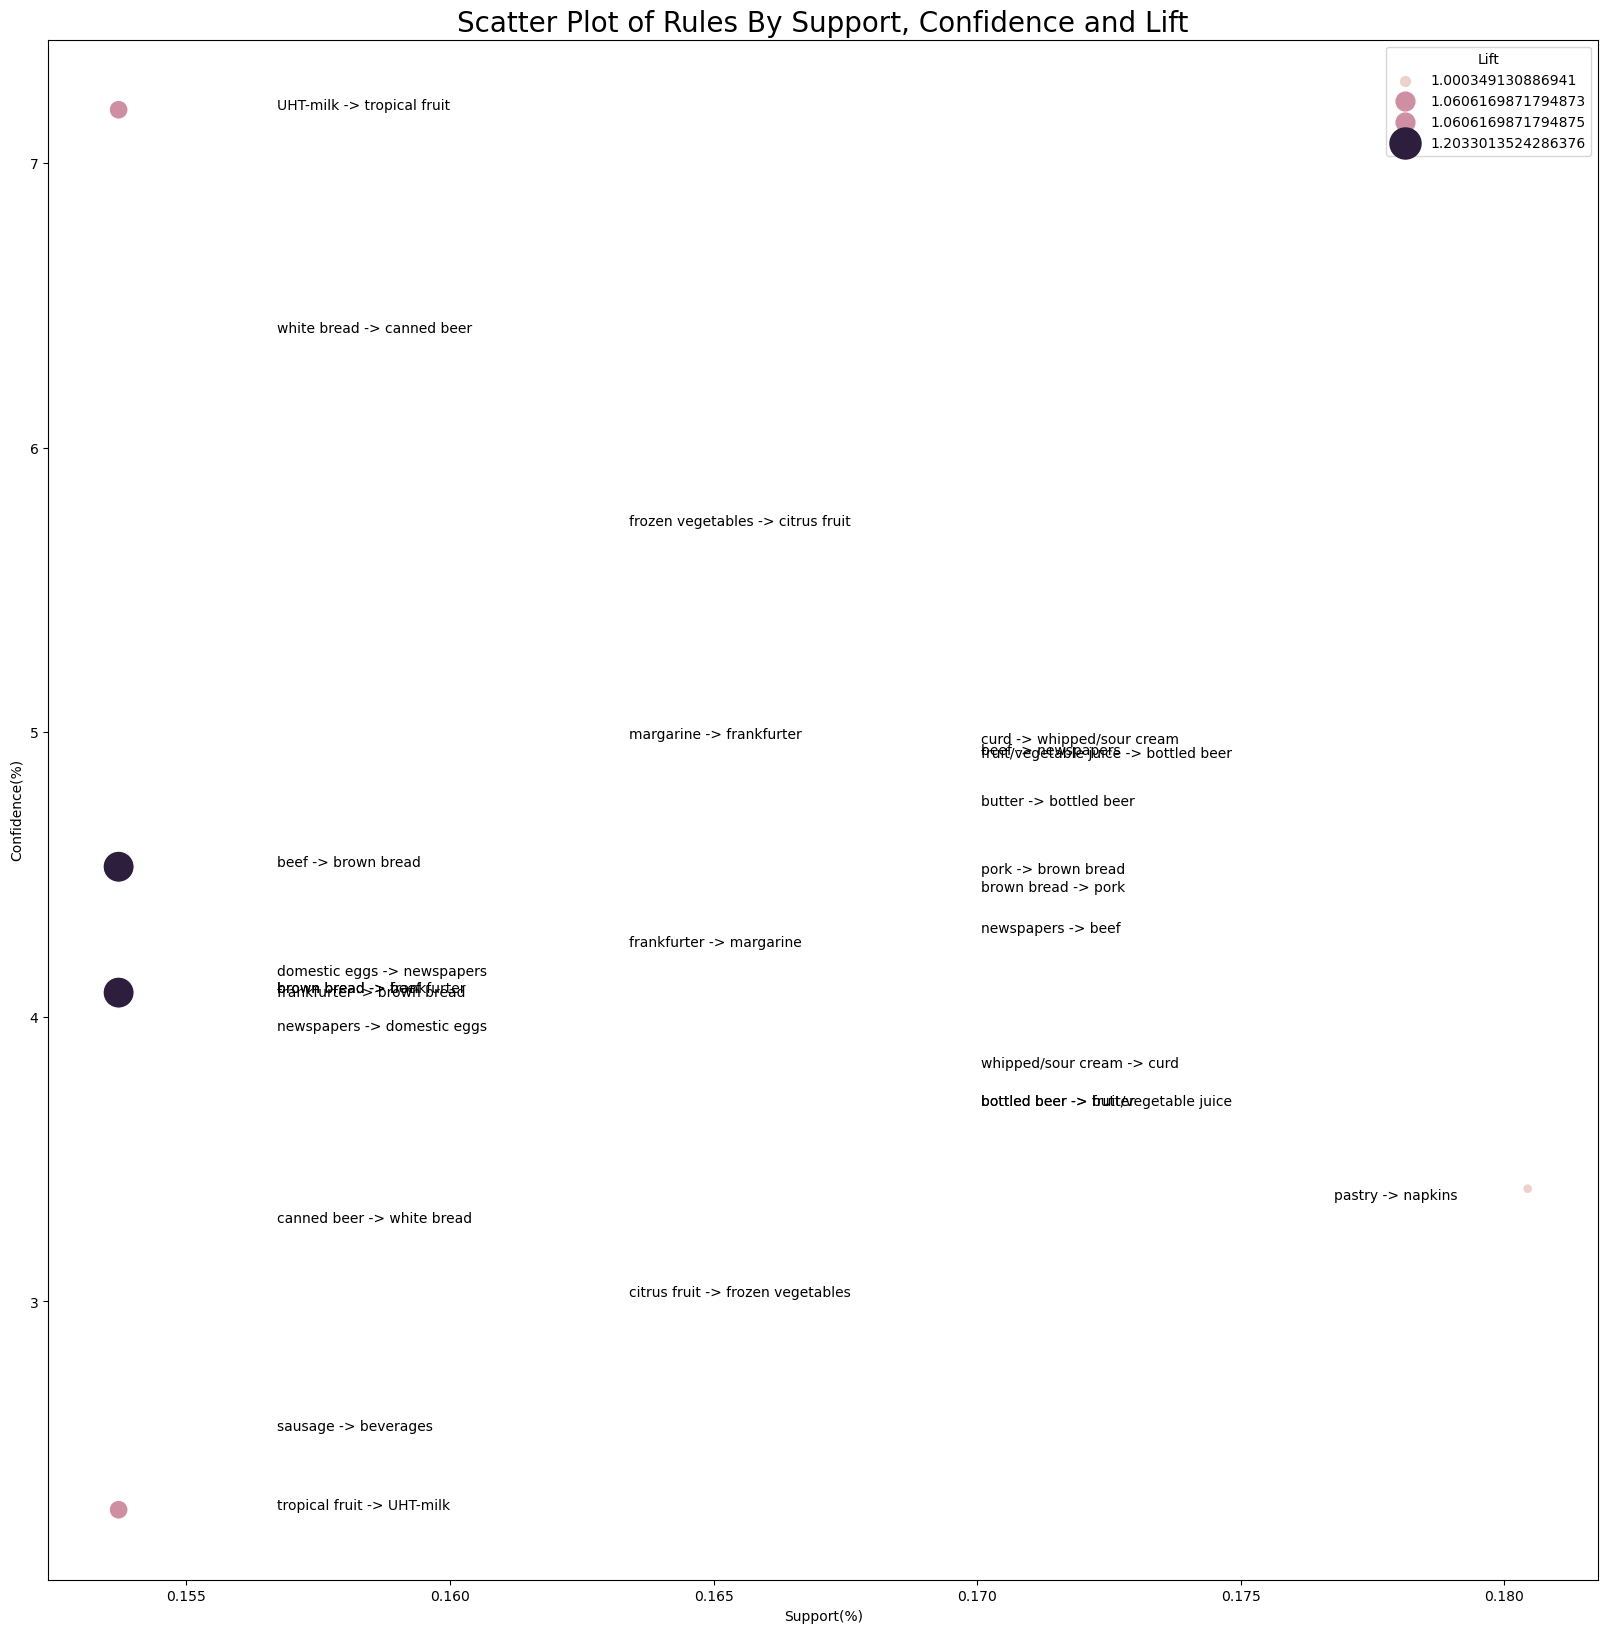

In [21]:
# Plotting support, confidence and lift of rules
plt.figure(figsize = (20,20))
support = final_df['Support(%)']
confidence = final_df['Confidence(%)']
rule = final_df['Rules']
ax = sns.scatterplot(data = final_df[:5], x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)

In [41]:
df_grouped.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Purchased_Items
0,1000,15-03-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"[sausage, semi-finished bread, whole milk, yog..."
1,1000,24-06-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[pastry, salty snack, whole milk]"
2,1000,24-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[canned beer, misc. beverages]"
3,1000,25-11-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[hygiene articles, sausage]"
4,1000,27-05-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[pickled vegetables, soda]"


In [42]:
df_grouped_cl = df_grouped.drop(columns=['Purchased_Items'])

In [44]:
from sklearn.cluster import KMeans

# Assuming df_grouped is your preprocessed DataFrame
X = df_grouped_cl.drop(columns=['Member_number', 'Date'])  # dropping non-item columns

kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
kmeans.fit(X)

# The cluster assignment for each row in the DataFrame
clusters = kmeans.labels_

# You can add the cluster assignments back to your original DataFrame
df_grouped['Cluster'] = clusters


/Users/morgantucker/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


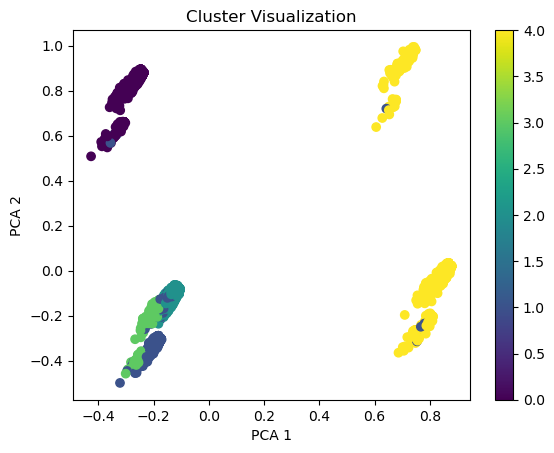

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

plt.scatter(reduced_X[:,0], reduced_X[:,1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


In [47]:
# Check the count of items in each cluster
cluster_counts = pd.Series(clusters).value_counts()

# Viewing the cluster centers
cluster_centers = kmeans.cluster_centers_

print(cluster_counts)
print(cluster_centers)


2    7971
4    2353
1    1891
0    1602
3    1146
dtype: int64
[[ 1.24843945e-03  1.87265918e-02  1.87265918e-03  6.24219725e-04
   6.24219725e-04  6.24219725e-04  4.36953808e-03  1.24843945e-03
   2.12234707e-02  2.30961298e-02  1.56054931e-02  3.93258427e-02
   4.55680400e-02  1.24843945e-03  2.49687890e-02  2.43445693e-02
   9.36329588e-03  3.12109863e-03  2.49687890e-03  9.36329588e-03
   3.24594257e-02  4.36953808e-03  6.24219725e-04  3.74531835e-03
   6.24219725e-03  3.12109863e-03  9.98751561e-03  1.99750312e-02
   1.43570537e-02  2.49687890e-03  4.05742821e-02  1.87265918e-03
   3.12109863e-03  1.95156391e-18  1.93508115e-02  6.24219725e-03
   1.24843945e-03  1.24843945e-03  1.19262239e-18  1.81023720e-02
   2.99625468e-02  1.24843945e-03  5.42101086e-19  1.24843945e-03
   1.93508115e-02  4.99375780e-03  3.12109863e-03  8.73907615e-03
   1.87265918e-03  2.68414482e-02  1.87265918e-03  3.74531835e-03
   1.87265918e-03  4.99375780e-03  1.87265918e-03  1.24843945e-03
   4.05742821